[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading common_words: Package 'common_words' not
[nltk_data]     found in index


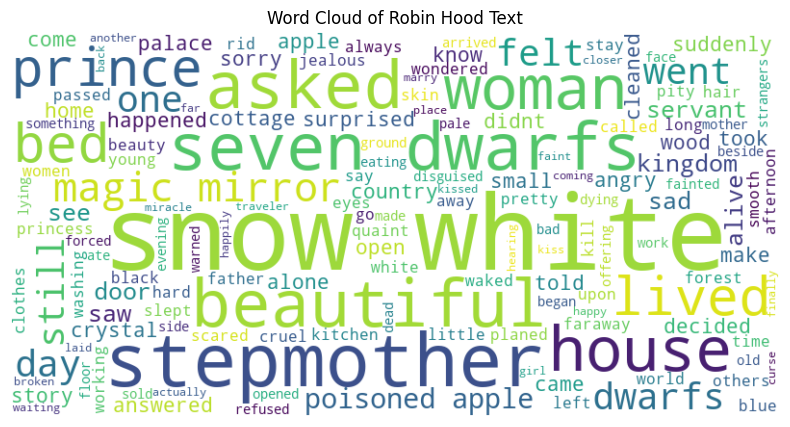

C:\Users\Deri Rian\AppData\Local\Temp\ipykernel_17452\101763288.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


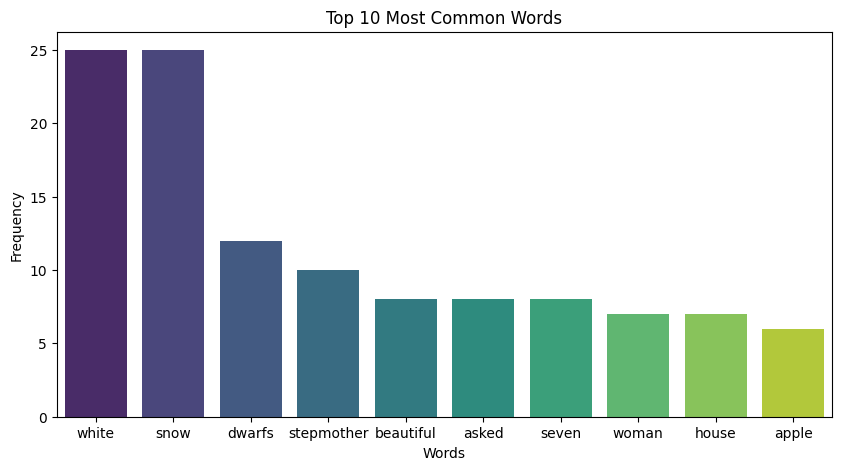

C:\Users\Deri Rian\AppData\Local\Temp\ipykernel_17452\101763288.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='coolwarm')


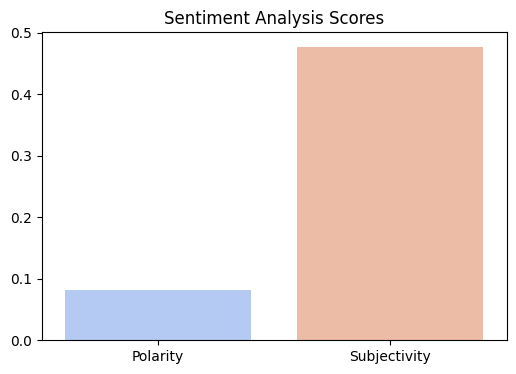

Sentiment Analysis:
Polarity: 0.0810368217054263
Subjectivity: 0.47699612403100766


In [9]:
import re
import nltk
nltk.download('stopwords')
nltk.download('common_words')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from textblob import TextBlob


# Teks yang akan dianalisis
text = """
Long long time ago, in England in Sherwood Forest lived Robin Hood.
When he was a boy, he had been cheated by a few noblemen.
Since then he had decided that he would rob the rich and give what he got to the poor.
The Sheriff of Nottingham had made an advertisement that he would give many rewards for the capture of Robin Hood, nobody had ever caught him.
It was because Robin Hood had a number of friends who served him. They acted as informers.
When the Sheriff had any plan to catch him, they would warn Robin Hood.
Many rich people were scared of going through Sherwood Forest because they knew that Robin Hood would attack them.
The Sheriff couldn’t stand it anymore.
Then he went to ask for the king’s help.
However, the king refused to send any of his men to help in the capture of Robin Hood.
One day The Sheriff and the noblemen held a competition to choose the best shooter in Nottingham.
It was for capturing Robin Hood.
Robin Hood was an excellent shooter.
Therefore, Robin Hood would participate in the competition to prove that he was the best.
He had been warned by his servant, but Robin wasn’t willing to listen.
The competition began.
William, The Sheriff man, and the man in green were trying for the first prize.
It was time for the last arrow to be shot.
The winner of this round would be declared the best shooter in Nottingham.
William could shot very close to the center.
Then the man in green’s turn made the crowd cheer hysterically.
His arrow went through William’s arrows and the center of the target.
Then he shot two more arrows towards the chair on which the Sheriff sat.
No doubt that the man in green was Robin Hood.
Immediately Robin Hood pulled of his black wig and then jumped over a wall onto his waiting horse and was gone.
The Sheriff shouted to his men to catch him, but it was too late.
Robin Hood escaped successfully.
"""

# Membersihkan teks
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

# Menghapus stopwords
filtered_words = [word for word in cleaned_text.split() if word not in stop_words]

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Robin Hood Text")
plt.show()

# Membuat bar plot frekuensi kata
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(10)

# Bar plot dengan keyword arguments
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Common Words")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

# Analisis sentimen
blob = TextBlob(text)
sentiment = blob.sentiment

# Plot untuk sentiment dengan keyword arguments
labels = ['Polarity', 'Subjectivity']
scores = [sentiment.polarity, sentiment.subjectivity]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=scores, palette='coolwarm')
plt.title("Sentiment Analysis Scores")
plt.show()

print(f"Sentiment Analysis:\nPolarity: {sentiment.polarity}\nSubjectivity: {sentiment.subjectivity}")
